## Plots from X-ray absorption calculations using ORCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.colors import  ListedColormap
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

____________________________

In [2]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [3]:
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

--------------

In [4]:
"""
Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


cmaps = [('Sequential (2)', ['cool', 'copper', 'winter']),
         ('Diverging',      ['coolwarm']),
         ('Miscellaneous',  ['gist_rainbow', 'jet', 'brg', 'rainbow'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

#for cmap_category, cmap_list in cmaps:
#    plot_color_gradients(cmap_category, cmap_list)

#plt.show()


--------------

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

#### Pair amino acid interaction between phenylalanine (F) and tyronise (Y)

##### System of study: Phe $---$Tyr (varying inter fragment distances)

### Header test

In [5]:
fy_25 = pd.read_csv('AB_2.5A.csv', delimiter=',')
fy_25.head()
fy_25.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
fy_25

,Energy,Intensity,dx,dy,dz
0,288.02,0.000000,0.000000,0.000000,0.000000
1,288.04,0.000000,0.000000,0.000000,0.000000
2,288.06,0.000000,0.000000,0.000000,0.000000
3,288.08,0.000000,0.000000,0.000000,0.000000
4,288.10,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2994,348.92,10.573084,9.978289,0.217154,0.377642
2995,348.94,9.073653,8.563040,0.186333,0.324280
2996,348.96,7.737489,7.301925,0.158874,0.276691
2997,348.98,6.556246,6.187057,0.134602,0.234586


##### dx,dy and dz correspond to the x-, y- and z-components of the transition moment (d)

### F$---$Y ( $n=2.5, 2.6, ..., 3.0, ..., 11.0 \overset{\circ}{A}$  )
#### optimized at PM7

In [12]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post=".csv"
list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#l_tmp = [85, 90, 95, 100, 105, 110]
#list_suf = [i for i in range(25,81)]
#for i in l_tmp:
#    list_suf.append(i)
#csv_suf = [i/10 for i in list_suf]
for ii in list_suf:
    globals()['fy_%s' % str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['fy_%s' % str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
fy_50

,Energy,Intensity,dx,dy,dz
0,288.02,0.0,0.0,0.0,0.0
1,288.04,0.0,0.0,0.0,0.0
2,288.06,0.0,0.0,0.0,0.0
3,288.08,0.0,0.0,0.0,0.0
4,288.10,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2994,348.92,0.0,0.0,0.0,0.0
2995,348.94,0.0,0.0,0.0,0.0
2996,348.96,0.0,0.0,0.0,0.0
2997,348.98,0.0,0.0,0.0,0.0


In [6]:
list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
list_suf_1 = [30, 35, 40, 45, 50, 55]
list_suf_2 = [30, 35, 40, 45, 50, 55, 60, 65]

##### Raw spectra

In [30]:
def plot_xray(global_name, list_suf, x_arg, y_arg, label, xlmt=False, xmin=288, xmax=310, \
              scalec=False, ref_list=list_suf, \
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))

    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    plt.legend(loc='upper left');
    plt.show()
    

In [14]:
def newxrange(data, col, minl, maxl):
    """
    this function crops a pd data frame
    """
    return data.loc[(data[col]>=minl) & (data[col]<=maxl)]

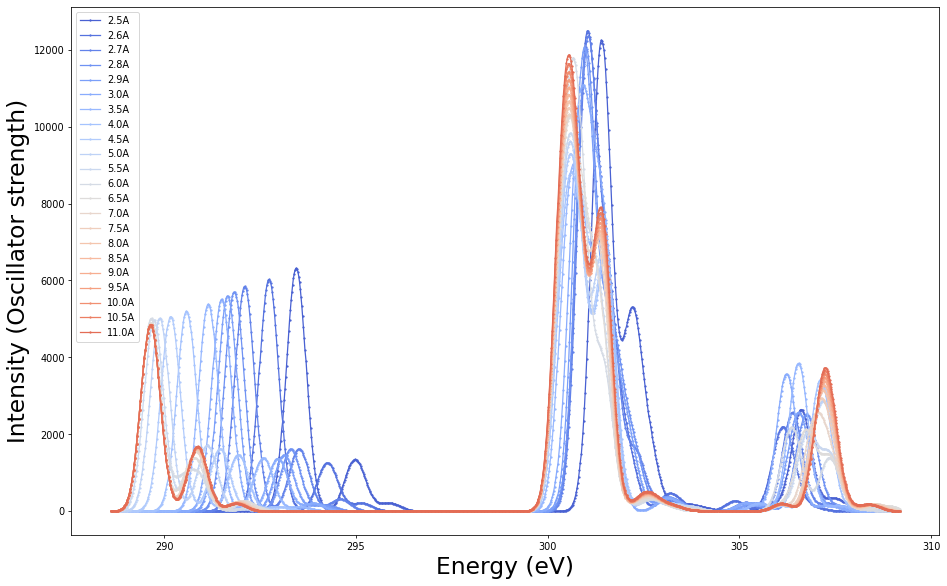

In [55]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288.6, xmax=309.2)

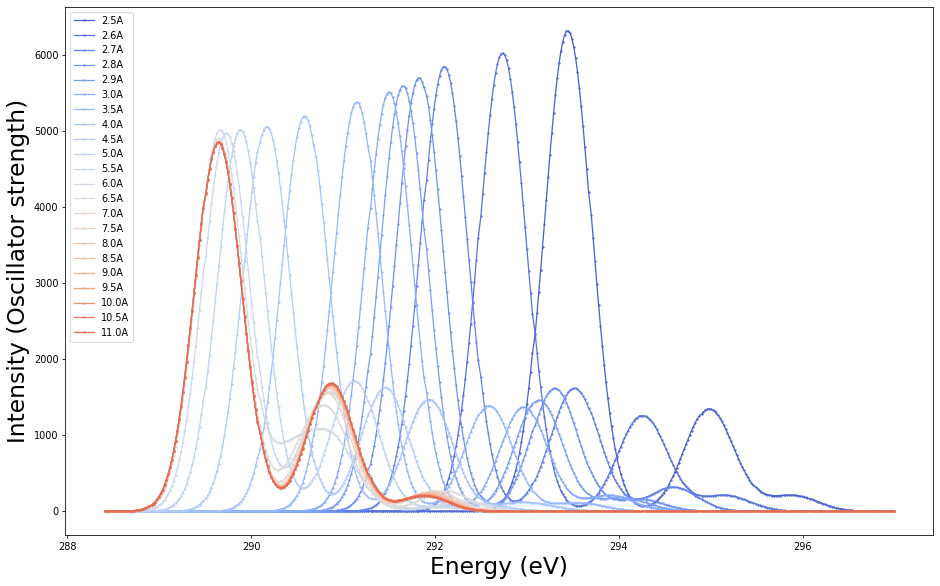

In [60]:
plot_xray(global_name, list_suf, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288.4, xmax=297)

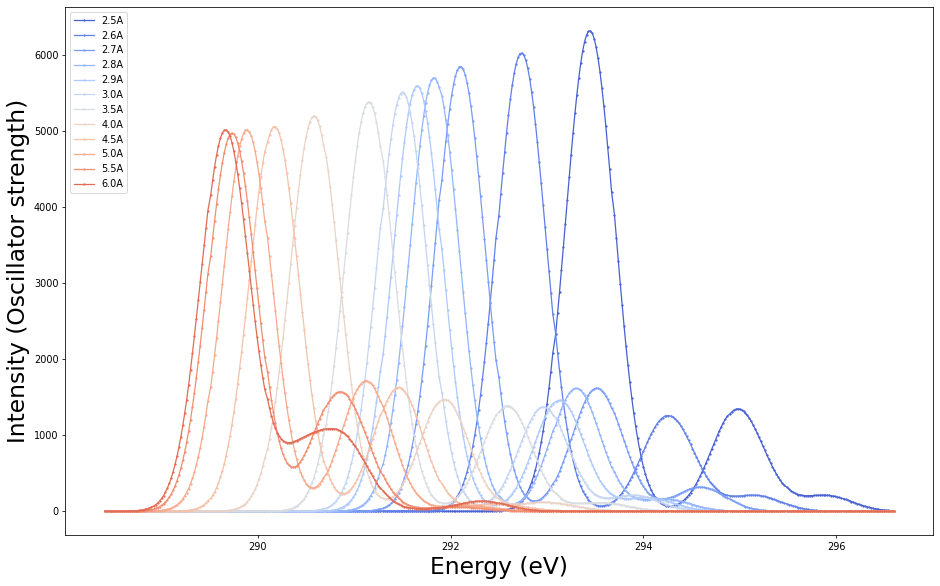

In [69]:
list_shorter = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60]
global_name = [globals()['fy_%s' % str(ii)] for ii in list_shorter] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_shorter] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_shorter, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288.4, xmax=296.6)

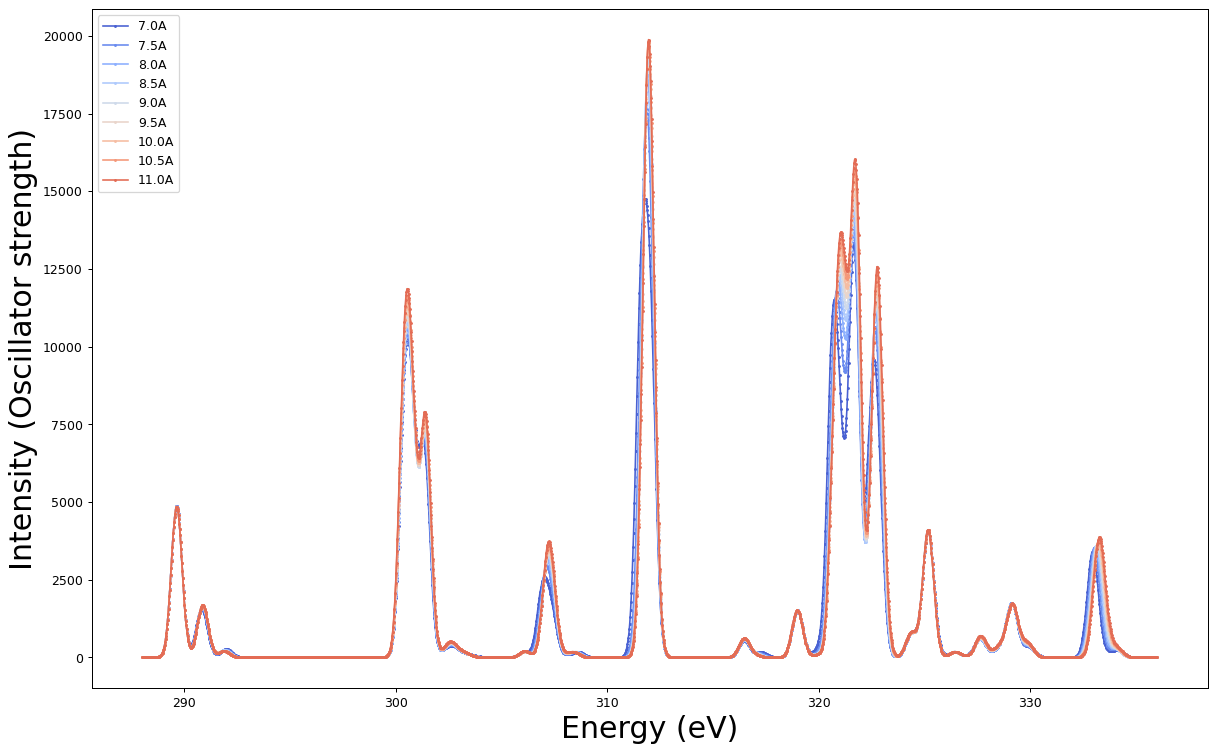

In [36]:
list_suf_longer = [70, 75, 80, 85, 90, 95, 100, 105, 110]
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_longer] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_longer] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_longer, 'Energy', 'Intensity', label_name, dpi=90, \
          xlmt=True, xmin=288, xmax=336)

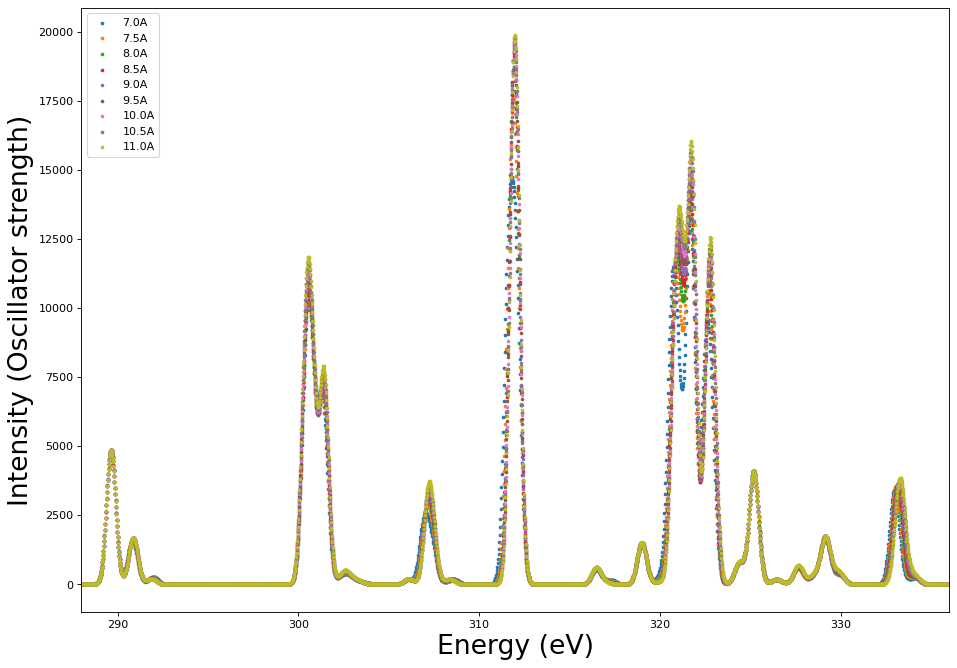

In [14]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)

for ii in list_suf_longer:
    n2.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([288,336])
plt.show()

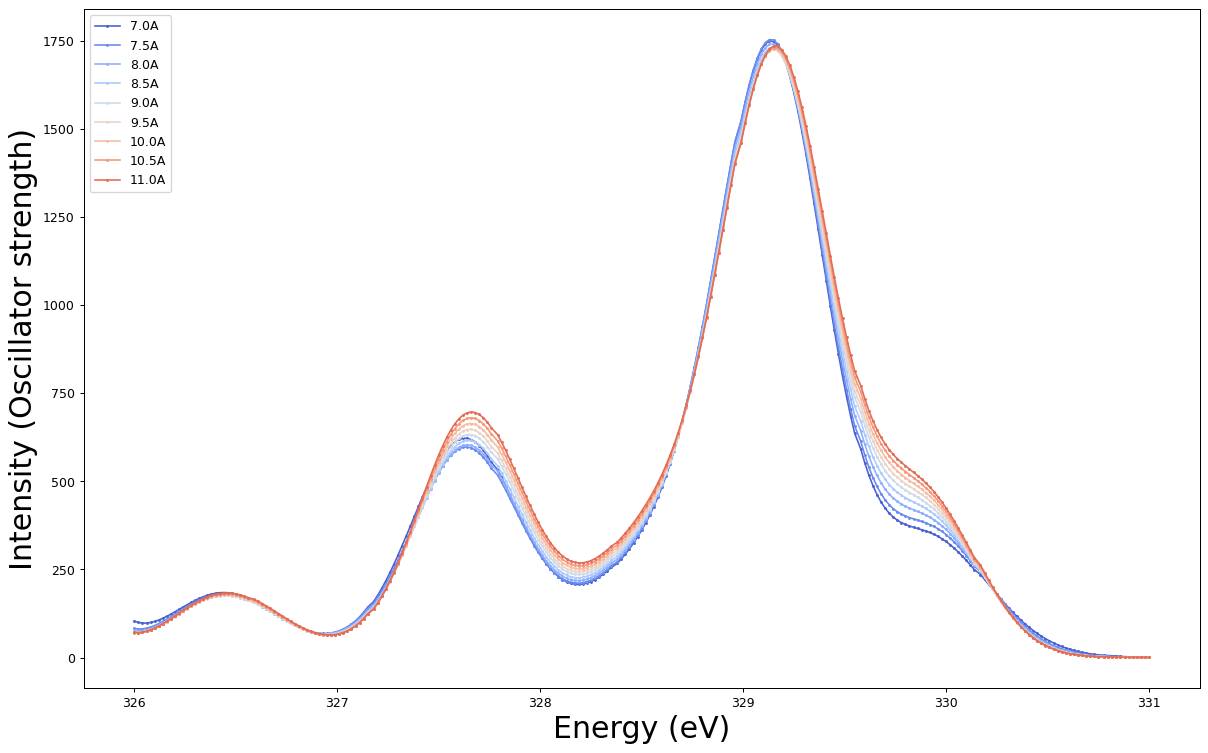

In [37]:
plot_xray(global_name, list_suf_longer, 'Energy', 'Intensity', label_name, dpi=90, \
          xlmt=True, xmin=326, xmax=331)

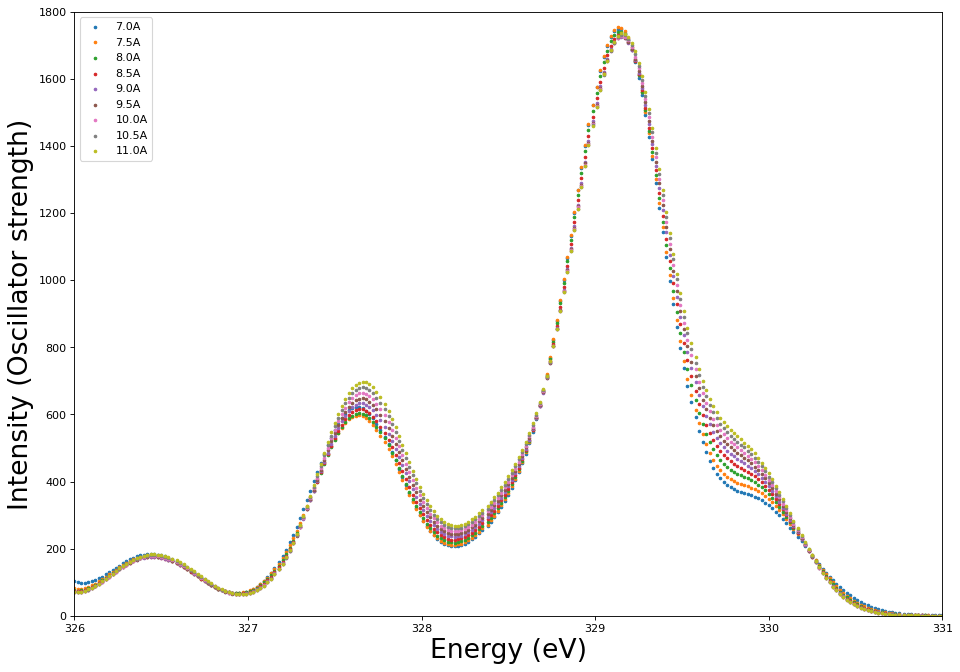

In [15]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)

for ii in list_suf_longer:
    n2.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
#plt.xlim([289,290.3]) #no changes
#plt.ylim([0,5000])
#second peak
#plt.xlim([290.3,291.5]) #no changes (~200 intensity units changes)
#plt.ylim([0,1700])
#third peak
#plt.xlim([299.5,302.3]) #changes! (~2000 intensity units changes)
#plt.ylim([0,12500])
#fourth peak
#plt.xlim([305.5,309]) #changes! (~1000 intensity units changes)
#plt.ylim([0,4000])
#fifth peak
#plt.xlim([310.7,313]) #changes! (~5000 intensity units changes)
#plt.ylim([0,21000])
#sixth peak
#plt.xlim([315.5,318]) #no changes (~100 intensity units changes)
#plt.ylim([0,650])
#seventh peak
#plt.xlim([318.2,319.6]) #no changes
#plt.ylim([0,1700])
#eighth peak
#plt.xlim([319.7,323.7]) #changes (~5000 intensity units changes)
#plt.ylim([0,17000])
#ninth peak
#plt.xlim([323.8,326]) #no changes
#plt.ylim([0,4500])
#tenth peak
plt.xlim([326,331]) #no changes (~100 intensity units changes)
plt.ylim([0,1800])
#eleventh peak
#plt.xlim([332,335]) #no changes (~100 intensity units changes)
#plt.ylim([0,4000])
#twelfth peak
#plt.xlim([336,338]) #no changes (~10 intensity units changes)
#plt.ylim([0,50])
plt.show()

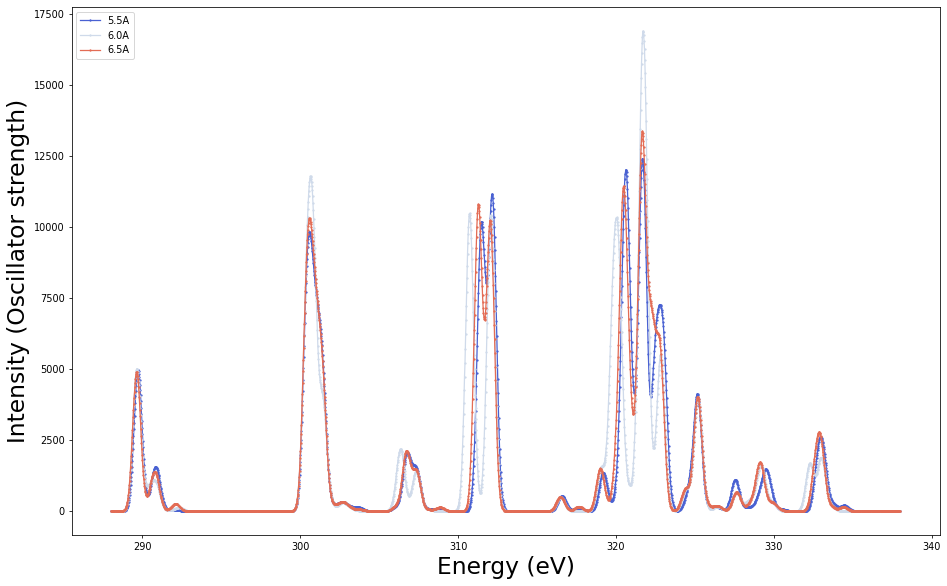

In [39]:
list_suf_middle = [55, 60, 65]
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_middle] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_middle] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_middle, 'Energy', 'Intensity', label_name, dpi=70, \
          xlmt=True, xmin=288, xmax=338)

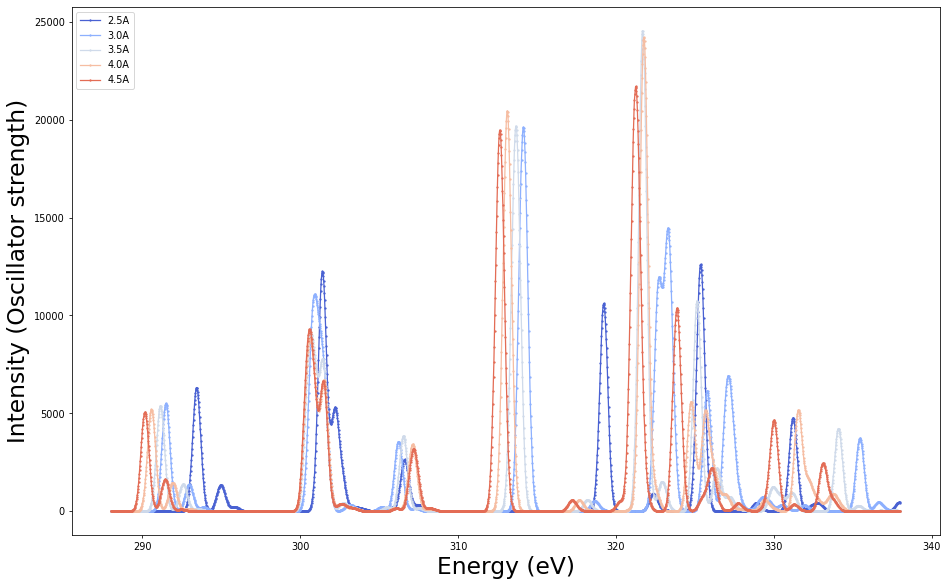

In [41]:
list_suf_short = [25, 30, 35, 40, 45]#[30, 35, 40, 45, 50]#[25,
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf_short] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_short] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_short, 'Energy', 'Intensity', label_name, dpi=70, \
          xlmt=True, xmin=288, xmax=338)

### First section
#### First and second peaks

In [20]:
list_suf_short1 = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 45, 50, 55, 60, 65]
list_suf_long1 = [60, 61, 62, 63, 64, 65, 70, 71, 72, 73, 74, 75, 80, 85, 90, 95, 100, 105, 110]

KeyError: 'fy_31'

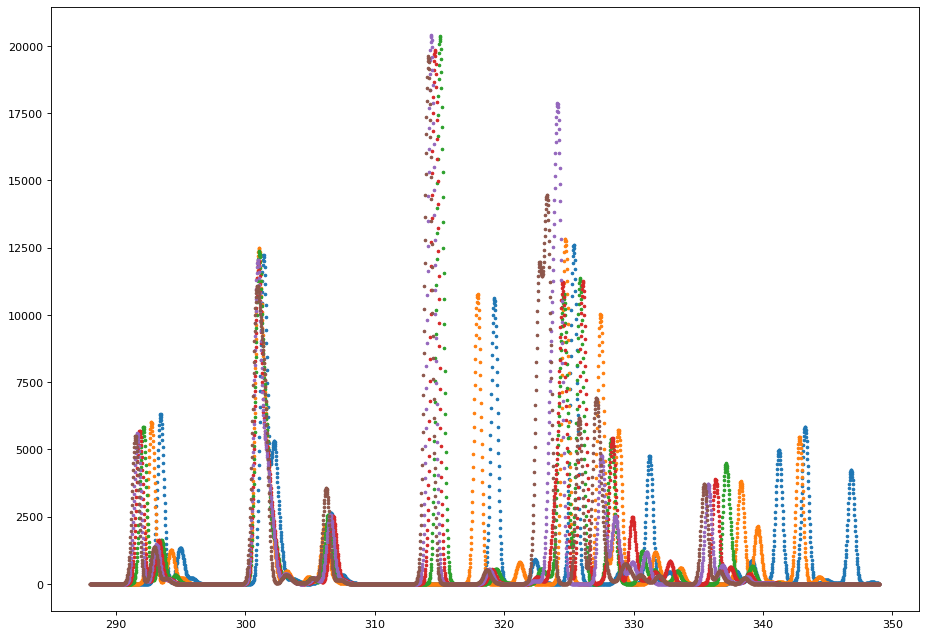

In [21]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short1:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([288.5,297]) #no changes
plt.ylim([0,6800])
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long1:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([288.5,293]) #no changes
plt.ylim([0,5200])
plt.show()

In [ ]:
fy_30[['Energy','Intensity']][0:400].max()

### Second section
#### Third peak

In [ ]:
#list_suf_short2 = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40]
list_suf_short2 = [i for i in range(25,41)]
#list_suf_middle2 = [30, 31, 32, 33, 34, 35, 40, 45, 50, 55, 60, 65]
list_suf_middle2 = [i for i in range(30,66)]
list_suf_long2 = [60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short2:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#second section
plt.xlim([299.6,303.5]) #no changes
plt.ylim([0,12700])
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle2:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#second section
plt.xlim([299.6,302.1]) #no changes
plt.ylim([0,12300])
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long2:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([299.6,302.1]) #no changes
plt.ylim([0,12500])
plt.show()

### Third section
#### Fourth peak

In [ ]:
list_suf_shorter3 = [26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
list_suf_short3 = [30, 35, 40, 45, 50]
list_suf_outlier3 = [25, 55, 60]
list_suf_long3 = [i for i in range(65,81)]
tmp = [85, 90, 95, 100, 105, 110]
for i in l_tmp:
    list_suf_long3.append(i)

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_shorter3:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([305.6,308]) #no changes
plt.ylim([0,4000])
#fourth peak
#plt.xlim([305.5,309]) #changes! (~1000 intensity units changes)
#plt.ylim([0,3000])
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short3:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([305.6,308]) #no changes
plt.ylim([0,4000])
#fourth peak
#plt.xlim([305.5,309]) #changes! (~1000 intensity units changes)
#plt.ylim([0,3000])
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier3:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([305.6,308]) #no changes
plt.ylim([0,5000])
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long3:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#first peak
plt.xlim([305.5,308]) #no changes
plt.ylim([0,4000])
plt.show()

### Fourth section
#### Fifth peak

In [ ]:
list_suf_short4 = [26, 27, 28, 29, 30, 35, 40, 45, 50, 55]
list_suf_long4 = [55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short4:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([309.9,318.6])#315
plt.ylim([0,21000])
#fifth peak
#plt.xlim([310.7,313]) #changes! (~5000 intensity units changes)
#plt.ylim([0,21000])
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long4:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#plt.xlim([309.9,315.1])
plt.xlim([309.9,313])
plt.ylim([0,21000])
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#plt.xlim([309.9,315.1])
plt.xlim([309.9,318.6])
plt.ylim([0,21000])
plt.show()

### Fifth section
#### sixth and seventh peaks

In [ ]:
list_suf_long5 = [27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
list_suf_outlier5 = [25, 26, 27, 28, 29, 30, 35, 40, 45]

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long5:
    if ii<30:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1630], globals()['fy_%s' % str(ii)][['Intensity']][:1630], s=5, label=str(ii/10)+'A')
    elif ii<45 and ii>30:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1530], globals()['fy_%s' % str(ii)][['Intensity']][:1530], s=5, label=str(ii/10)+'A')
    else:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1485], globals()['fy_%s' % str(ii)][['Intensity']][:1485], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([315.8,320.1])
plt.ylim([0,650])
#sixth peak
#plt.xlim([315.5,318]) #no changes (~100 intensity units changes)
#plt.ylim([0,650])
#seventh peak
#plt.xlim([318.2,319.6]) #no changes
#plt.ylim([0,1700])
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier5:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([315.8,323.1])
plt.ylim([0,11650])
plt.show()

### Sixth section
#### eighth and ninth peaks

In [ ]:
list_suf_short6 = [35, 40, 45]
list_suf_outlier6 = [25, 26, 27, 28, 29, 30]
list_suf_middle6 = [50, 55, 60]
list_suf_long6 = [65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_short6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')

plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,25500])
#eighth peak
#plt.xlim([319.7,323.7]) #changes (~5000 intensity units changes)
#plt.ylim([0,19000])
#ninth peak
#plt.xlim([323.8,326]) #no changes
#plt.ylim([0,4500])
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,23500])

plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long6:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,16800])

plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier6:
    if 30>ii:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    else:
        n5.scatter(globals()['fy_%s' % str(ii)][['Energy']][:1888], globals()['fy_%s' % str(ii)][['Intensity']][:1888], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([318.5,327])
plt.ylim([0,17800])

plt.show()

### Seventh section
#### tenth peak

In [ ]:
list_suf_middle7 = [50, 55, 60, 65]
list_suf_long7 = [65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
list_suf_outlier7 = [25, 26, 27, 28, 29, 30, 35, 40, 45]

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle7:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326.8,332])#331
plt.ylim([0,1800])
#tenth peak
#plt.xlim([326,331]) #no changes (~100 intensity units changes)
#plt.ylim([0,1800])
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long7:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326.8,331])
plt.ylim([0,1800])

plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier7:
    
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([326,336])
plt.ylim([0,5000])

plt.show()

### Eighth section
#### eleventh and twelfth peaks

In [ ]:
list_suf_outlier8 = [25, 26, 27, 28, 29, 30, 35, 40, 45]
list_suf_middle8 = [40, 45, 50, 55, 60, 65]
list_suf_long8 = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75, 80, 85, 90, 95, 100, 105, 110]

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_outlier8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([328,338])#348
plt.ylim([0,6000])
#eleventh peak
#plt.xlim([332,335]) #no changes (~100 intensity units changes)
#plt.ylim([0,4000])
#twelfth peak
#plt.xlim([336,338]) #no changes (~10 intensity units changes)
#plt.ylim([0,50])
plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_middle8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([331,335])
plt.ylim([0,3000])

plt.show()

In [ ]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n5 = fig.add_subplot(111)

for ii in list_suf_long8:
    n5.scatter(globals()['fy_%s' % str(ii)][['Energy']], globals()['fy_%s' % str(ii)][['Intensity']], s=5, label=str(ii/10)+'A')
    
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.xlim([331,335])
plt.ylim([0,4000])

plt.show()

### Relative intensities

In [ ]:
max_10fy = g10fy[['Intensity']].max()
max_9fy = g9fgy[['Intensity']].max()
max_8fy = g8fg2y[['Intensity']].max()
max_7fy = g7fg3y[['Intensity']].max()
max_6fy = g6fg4y[['Intensity']].max()
max_5fy = g5fg5y[['Intensity']].max()
max_4fy = g4fg6y[['Intensity']].max()
max_3fy = g3fg7y[['Intensity']].max()
max_2fy = g2fg8y[['Intensity']].max()
max_10f = g10fg[['Intensity']].max()
max_10y = g11y[['Intensity']].max()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g10fy[['Energy']],g10fy[['Intensity']]/max_10fy, s=5, label='G10FY')
n2.scatter(g9fgy[['Energy']],g9fgy[['Intensity']]/max_9fy, s=5, label='G9FGY')
#n2.scatter(g8fg2y[['Energy']],g8fg2y[['Intensity']]/max_8fy, s=5, label='G8FG2Y')
n2.scatter(g7fg3y[['Energy']],g7fg3y[['Intensity']]/max_7fy, s=5, label='G7FG3Y')
#n2.scatter(g6fg4y[['Energy']],g6fg4y[['Intensity']]/max_6fy, s=5, label='G6FG4Y')
n2.scatter(g5fg5y[['Energy']],g5fg5y[['Intensity']]/max_5fy, s=5, label='G5FG5Y')
#n2.scatter(g4fg6y[['Energy']],g4fg6y[['Intensity']]/max_4fy, s=5, label='G4FG6Y')
#n2.scatter(g3fg7y[['Energy']],g3fg7y[['Intensity']]/max_3fy, s=5, label='G3FG7Y')
#n2.scatter(g2fg8y[['Energy']],g2fg8y[['Intensity']]/max_2fy, s=5, label='G2FG8Y')

plt.xlabel('Energy (eV)')
plt.ylabel('Relative intensity')
plt.legend(loc='upper left');
plt.xlim([283.5,291])
plt.show()

In [ ]:
#Uncomment the original range to see more peaks outside the expected range
file="w.02/"
post=".csv"
g10py_02 = pd.read_csv(file+'G10PY'+post, delimiter=',')
g10py_01 = pd.read_csv(file+'G10PY_1'+post, delimiter=',')
g10py_005 = pd.read_csv(file+'G10PY_05'+post, delimiter=',')
g10py_001 = pd.read_csv(file+'G10PY_01'+post, delimiter=',')

g10py_02.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_01.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_005.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g10py_001.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g10py[['Energy']],g10py[['Intensity']], s=5, label='G10PY')
#n2.scatter(g10py_02[['Energy']],g10py_02[['Intensity']], s=5, label='G10PY w 0.2')
#n2.scatter(g10py_01[['Energy']],g10py_01[['Intensity']], s=5, label='G10PY w 0.1')
#n2.scatter(g10py_005[['Energy']],g10py_005[['Intensity']]/1, s=5, label='G10PY w 0.05')
#n2.scatter(g10py_001[['Energy']],g10py_001[['Intensity']]/1, s=5, label='G10PY w 0.01')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
#plt.xlim([289.5,289.9])
plt.show()